# S13_T01_Bases de dades relacionals


### Ex1: Crea una base relacional d’exemple utilitzant un document de text o a mà. Dissenya-la perquè contingui les següents taules, i estableix les relacions que consideris necessàries entre elles:

-	Taula de compres (transaccions)

-	Taula d’establiments

-	Taula de treballadors

-	Taula de clients

-	Taula de productes

-	Taula de tipus de productes

Defineix les propietats de les relacions (1:1, 1:n, n:n), i crea algunes de les variables que podrien contenir, per exemple:

Taula d’establiments
-	IDestabliment (unique key)

-	Nom

-	Localització

-	Superfície


Una base relacional està formada per un conjunt de relacions
En el nostre cas el sistema hauria d'incloure el control de totes les compres realitzades en els diferents establiments
Amb les taules que tenim i les interrelacions entre elles i els seus atributs crearem un base de dades relacional
Ens hem informat, i cada establiment consta de només un treballador, que pot canviar d'establiment. Els clients poden comprar diferents productes dins del mateix establiment, i també poden anar a comprar productes als diferents establiments.

He adjuntat al GitHub un excel que he preparat amb les diferents definicions de taules, entitats, interrelacions, clau primàries i cardinalitat creades per a la base relacional
Link "C:/Users/Beth/Python_Projects/Task_Sprint13/Task1/Base_relacional_Compres.xls"

Aqui poso un resum:

Entitats:	COMPRA	CLIENT	ESTABLIMENT	PRODUCTE	TREBALLADOR

Interrelacions:	
   * Treballa, entre ESTABLIMENT i TREBALLADOR(N-1)				
   * Ven, entre TREBALLADOR i PRODUCTE(M-N)				
   * Compra, entre CLIENT i ESTABLIMENT(1-N)				
   * Éscomprat, entre PRODUCTE i CLIENT(M-N)				

Clau primària:	
   * ESTABLIMENT(IDestabliment)				
   * CLIENT(IDclient)				
   * PRODUCTE(IDproducte)				
   * TREBALLADOR(IDtreballador)				
   * COMPRA(Idcompra)				
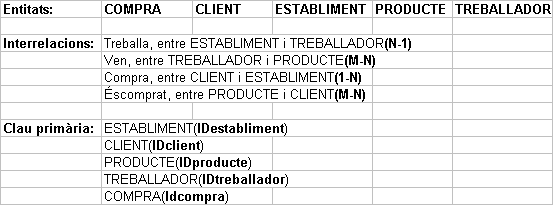

I ara en l'exercici 2 el diagrama entitat-relació creat amb dia-installer

### Ex2: Utilitza un programa de creació de diagrames entitat-relació com http://dia-installer.de per crear el diagrama

S'adjunta diagrama ER al GitHub junt amb el notebook de la tasca. com a "diagrama model ER.pdf"

### Ex3: Utilitza el Workbench de MySQL per crear un model relacional

Ara ja tenim les passes dels diferents dissenys (conceptual i lògic) per passar a fer el disseny físic. En un cas real hauriem d'haver recolectat la informació del client i futurs usuaris de la base de dades, per tenir en compte totes les opcions i necessitats de la base de dades, abans de fer el model ER.

In [16]:
import mysql.connector

In [17]:
mydb = mysql.connector.connect(
  host="localhost",
  user="Beth",
  password="B3thSQL@88"
)

mycursor = mydb.cursor()

#creem database "database_test"
mycursor.execute("CREATE DATABASE datbase_test")

In [18]:
#comprovem si s'ha creat la nostra base de dades

mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

('compras_establiments',)
('datbase_test',)
('information_schema',)
('mydatabase',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


In [21]:
#creem taula

mydb = mysql.connector.connect(
  host="localhost",
  user="Beth",
  password="B3thSQL@88",
  database="datbase_test"
)

mycursor = mydb.cursor()

mycursor.execute("CREATE TABLE testcomp (IDcompra VARCHAR(255) PRIMARY KEY, IDproducte VARCHAR(255), IDclient VARCHAR(255), IDestabliment VARCHAR(255), IDvenedor VARCHAR(255))")

In [22]:
#comprovem si ha creat la taula

mycursor.execute("SHOW TABLES")

for x in mycursor:
  print(x)

('testcomp',)


In [25]:
#podem insertar també valors (dades) en la taula que hem creat
sql = "INSERT INTO testcomp (IDcompra, IDproducte) VALUES (%s, %s)"
valor = ("0218EST01", "CRN0299")

mycursor.execute(sql, valor)

#aquesta instrucció és necessaria pq es facin els canvis a la taula
mydb.commit()

print(mycursor.rowcount, "els valors s'han inserit a la taula correctament")

1 els valors s'han inserit a la taula correctament


In [45]:
#a mode d'exemple he generat la base de dades datbase_test, i he generat una columna, que he omplert amb alguns valors.
#ara anem a mirar la base de dades (compras_establiments) creada directament amb el workbench de MySQL!

mydb = mysql.connector.connect(
  host="localhost",
  user="Beth",
  password="B3thSQL@88",
  database="compras_establiments"
)

mycursor = mydb.cursor()

mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

('compras_establiments',)
('datbase_test',)
('information_schema',)
('mydatabase',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


In [46]:
#llistem les taules que tenim creades a la base de dades
mycursor.execute("SHOW TABLES")

for x in mycursor:
  print(x)

('client',)
('compres',)
('establiment',)
('producte',)
('treballador',)


In [47]:
#llistem els camps de cada taula
mycursor = mydb.cursor()

mycursor.execute("SHOW COLUMNS FROM compres")

for x in mycursor:
  print(x)

('idcompra', b'varchar(255)', 'NO', 'PRI', None, '')
('idproducte', b'varchar(255)', 'NO', 'MUL', None, '')
('idclient', b'varchar(255)', 'NO', 'MUL', None, '')
('idestabliment', b'varchar(255)', 'NO', 'MUL', None, '')
('idvenedor', b'varchar(255)', 'NO', 'MUL', None, '')


In [48]:
mycursor = mydb.cursor()

mycursor.execute("SHOW COLUMNS FROM client")

for x in mycursor:
  print(x)

('idclient', b'varchar(255)', 'NO', 'PRI', None, '')
('nom', b'varchar(255)', 'NO', '', None, '')
('cognom', b'varchar(255)', 'NO', '', None, '')
('idestabliment', b'varchar(255)', 'NO', '', None, '')


In [49]:
mycursor = mydb.cursor()

mycursor.execute("SHOW COLUMNS FROM establiment")

for x in mycursor:
  print(x)

('idestabliment', b'varchar(255)', 'NO', 'PRI', None, '')
('nom', b'varchar(255)', 'NO', '', None, '')
('localitzacio', b'varchar(255)', 'NO', '', None, '')
('superficie', b'float', 'YES', '', None, '')


In [50]:
mycursor = mydb.cursor()

mycursor.execute("SHOW COLUMNS FROM producte")

for x in mycursor:
  print(x)

('idproducte', b'varchar(255)', 'NO', 'PRI', None, '')
('tipusproducte', b'int', 'NO', '', None, '')
('preu', b'float', 'YES', '', None, '')


In [51]:
mycursor = mydb.cursor()

mycursor.execute("SHOW COLUMNS FROM treballador")

for x in mycursor:
  print(x)

('idvenedor', b'varchar(255)', 'NO', 'PRI', None, '')
('NIF', b'varchar(45)', 'NO', '', None, '')
('nom', b'varchar(255)', 'NO', '', None, '')
('cognom', b'varchar(255)', 'NO', '', None, '')
('Sou', b'double', 'NO', '', None, '')
('idestabliment', b'varchar(255)', 'NO', 'MUL', None, '')


In [63]:
mycursor = mydb.cursor()

sql = "DELETE FROM producte"

mycursor.execute(sql)
mydb.commit()


#si volem insertar dades a les nostres taules, ho podem fer des d'aqui, des del workbench directament i amb la opció de carregar directament les dades des d'un arxiu .csv (proporcionat pel nostre client!) que seria la manera més ràpida i així evitar errades de tipografia

In [64]:
mycursor = mydb.cursor()

sql = "INSERT INTO producte (idproducte, tipusproducte) VALUES (%s, %s)"
values = [
  ('CRN0299', '28001'),
  ('CRN0889', '05234'),
  ('ZXD0052', '85210'),
  ('HJF1285', '25196'),
  ('HFJ0508', '28005')
]

mycursor.executemany(sql, values)

mydb.commit()

print(mycursor.rowcount, "files inserides")

5 files inserides


In [ ]:
#i així podriem anar omplint les diferents taules de la nostra base de dades